C:\Users\20223705\AppData\Local\Temp\ipykernel_35336\2035736518.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(activities))


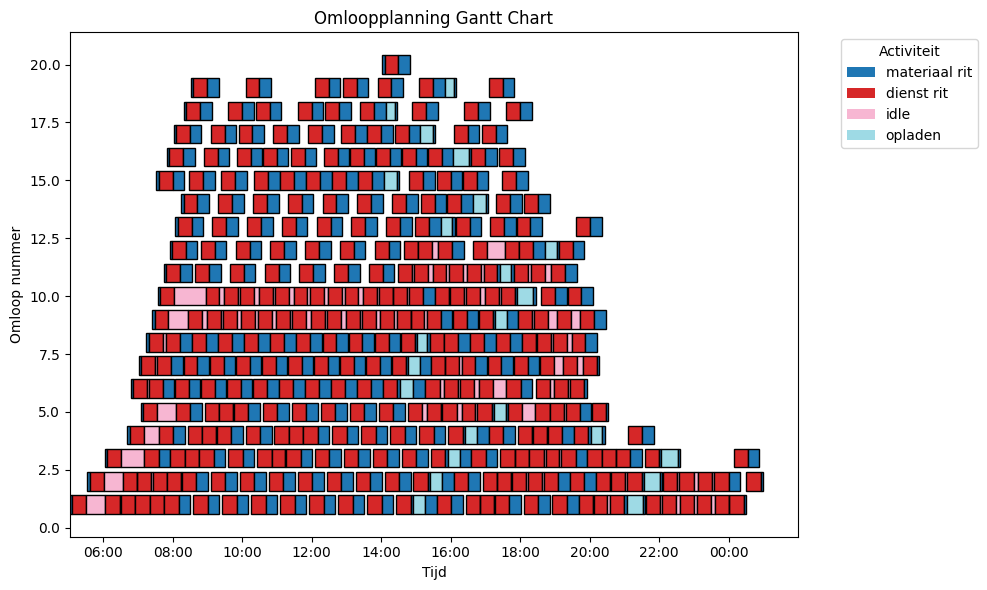

In [31]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Patch
import pandas as pd

df = pd.read_excel('omloopplanning.xlsx', engine='openpyxl')
# Convert starttijd and eindtijd to datetime for proper plotting
df['starttijd datum'] = pd.to_datetime(df['starttijd datum'])
df['eindtijd datum'] = pd.to_datetime(df['eindtijd datum'])

# Assign a color to each unique activity
activities = df['activiteit'].unique()
colors = plt.cm.get_cmap('tab20', len(activities))

color_dict = {activity: colors(i) for i, activity in enumerate(activities)}

# Create the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for idx, row in df.iterrows():
    ax.barh(row['omloop nummer'], 
            row['eindtijd datum'] - row['starttijd datum'], 
            left=row['starttijd datum'], 
            color=color_dict[row['activiteit']],
            edgecolor='black')

# Format x-axis for time
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Create legend
legend_elements = [Patch(facecolor=color_dict[activity], label=activity) for activity in activities]
ax.legend(handles=legend_elements, title="Activiteit", bbox_to_anchor=(1.05, 1), loc='upper left')

# Set labels and title
ax.set_xlabel('Tijd')
ax.set_ylabel('Omloop nummer')
ax.set_title('Omloopplanning Gantt Chart')

plt.tight_layout()
plt.show()


In [25]:
df.head()

,Unnamed: 0,startlocatie,eindlocatie,starttijd,eindtijd,activiteit,buslijn,energieverbruik,starttijd datum,eindtijd datum,omloop nummer
0,0,ehvgar,ehvbst,05:03:00,05:07:00,materiaal rit,NaN,1.9800,2024-08-29 05:03:00,2024-08-29 05:07:00,1
1,1,ehvbst,ehvapt,05:07:00,05:31:00,dienst rit,401.0,10.8036,2024-08-29 05:07:00,2024-08-29 05:31:00,1
2,2,ehvapt,ehvapt,05:31:00,06:04:00,idle,NaN,0.0100,2024-08-29 05:31:00,2024-08-29 06:04:00,1
3,3,ehvapt,ehvbst,06:04:00,06:29:00,dienst rit,401.0,10.8600,2024-08-29 06:04:00,2024-08-29 06:29:00,1
4,4,ehvbst,ehvbst,06:29:00,06:31:00,idle,NaN,0.0100,2024-08-29 06:29:00,2024-08-29 06:31:00,1
